In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# قائمة الكلاسات العشر في CIFAR-10:

# الرقم	اسم الكلاس	المجال أو الوصف
# 0	airplane	طائرات
# 1	automobile	سيارات (غير الشاحنات)
# 2	bird	طيور
# 3	cat	قطط
# 4	deer	غزلان
# 5	dog	كلاب
# 6	frog	ضفادع
# 7	horse	خيول
# 8	ship	سفن / قوارب
# 9	truck	شاحنات

In [2]:
# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تطبيع القيم
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# تحويل الفئات إلى one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [9]:
classes = cifar10.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 فئات
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2742 - loss: 1.9450 - val_accuracy: 0.4755 - val_loss: 1.4603
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5099 - loss: 1.3692 - val_accuracy: 0.5667 - val_loss: 1.2203
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5851 - loss: 1.1633 - val_accuracy: 0.6054 - val_loss: 1.1208
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6304 - loss: 1.0455 - val_accuracy: 0.6416 - val_loss: 1.0329
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6637 - loss: 0.9701 - val_accuracy: 0.6450 - val_loss: 1.0388
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6874 - loss: 0.8882 - val_accuracy: 0.6697 - val_loss: 0.9574
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7109 - loss: 0.8262 - val_accuracy: 0.6789 - val_loss: 0.9388
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7336 - loss: 0.7767 - val_accuracy: 0.

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6957 - loss: 1.0344
Accuracy: 69.71%


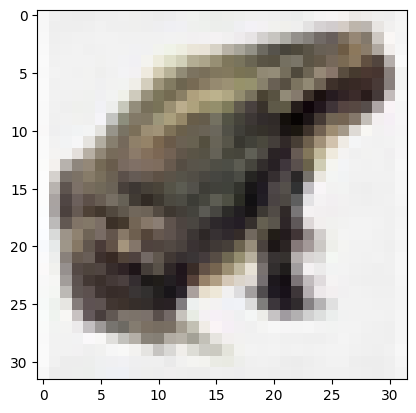

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: 3


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# عرض صورة من بيانات الاختبار
plt.imshow(x_test[7500])
plt.show()

# توقع الفئة
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")

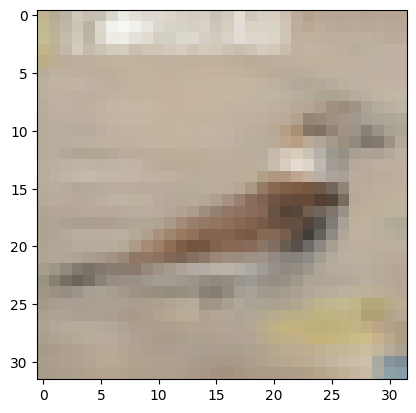

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Class: 3


In [8]:
plt.imshow(x_test[70])
plt.show()

# توقع الفئة
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")

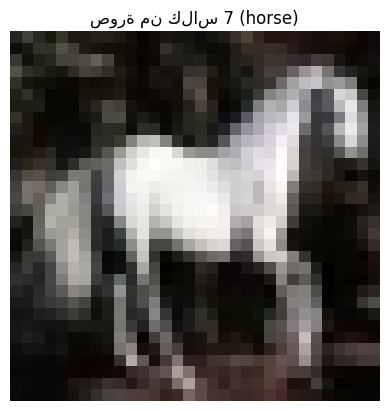

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
✔️ True class: 7 (horse)
🤖 Predicted class: 2 (bird)


In [26]:
class_id = 7

for i in range(len(y_test)):
    label = np.argmax(y_test[i]) if len(y_test[i]) > 1 else y_test[i]
    if label == class_id:
        airplane_index = i
        break

if airplane_index is not None:
    plt.imshow(x_test[airplane_index])
    plt.title(f"صورة من كلاس {class_id} ({classes[class_id]})")
    plt.axis('off')
    plt.show()

    prediction = model.predict(np.expand_dims(x_test[class_id], axis=0))
    predicted_class = np.argmax(prediction)

    print(f"✔️ True class: {class_id} ({classes[class_id]})")
    print(f"🤖 Predicted class: {predicted_class} ({classes[predicted_class]})")
else:
    print(f"❌ لم يتم العثور على صورة من كلاس {class_id}")